### Packages

In [1452]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [1453]:
mydata=pd.read_csv("https://raw.githubusercontent.com/jetharam171/Yhills_July12_Analytics/main/concrete.csv")

In [1454]:
mydata.shape

(1030, 9)

In [1455]:
mydata.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [1456]:
mydata.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [1457]:
mydata.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


In [1458]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [1459]:
mydata.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [1460]:
mydata.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [1461]:
mydata.describe(include="all")    

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [1462]:
df=mydata.copy()

In [1463]:
duplicate=mydata.duplicated()
print(duplicate.sum())

25


In [1464]:
mydata[duplicate]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30


In [1465]:
mydata.drop_duplicates(inplace=True)

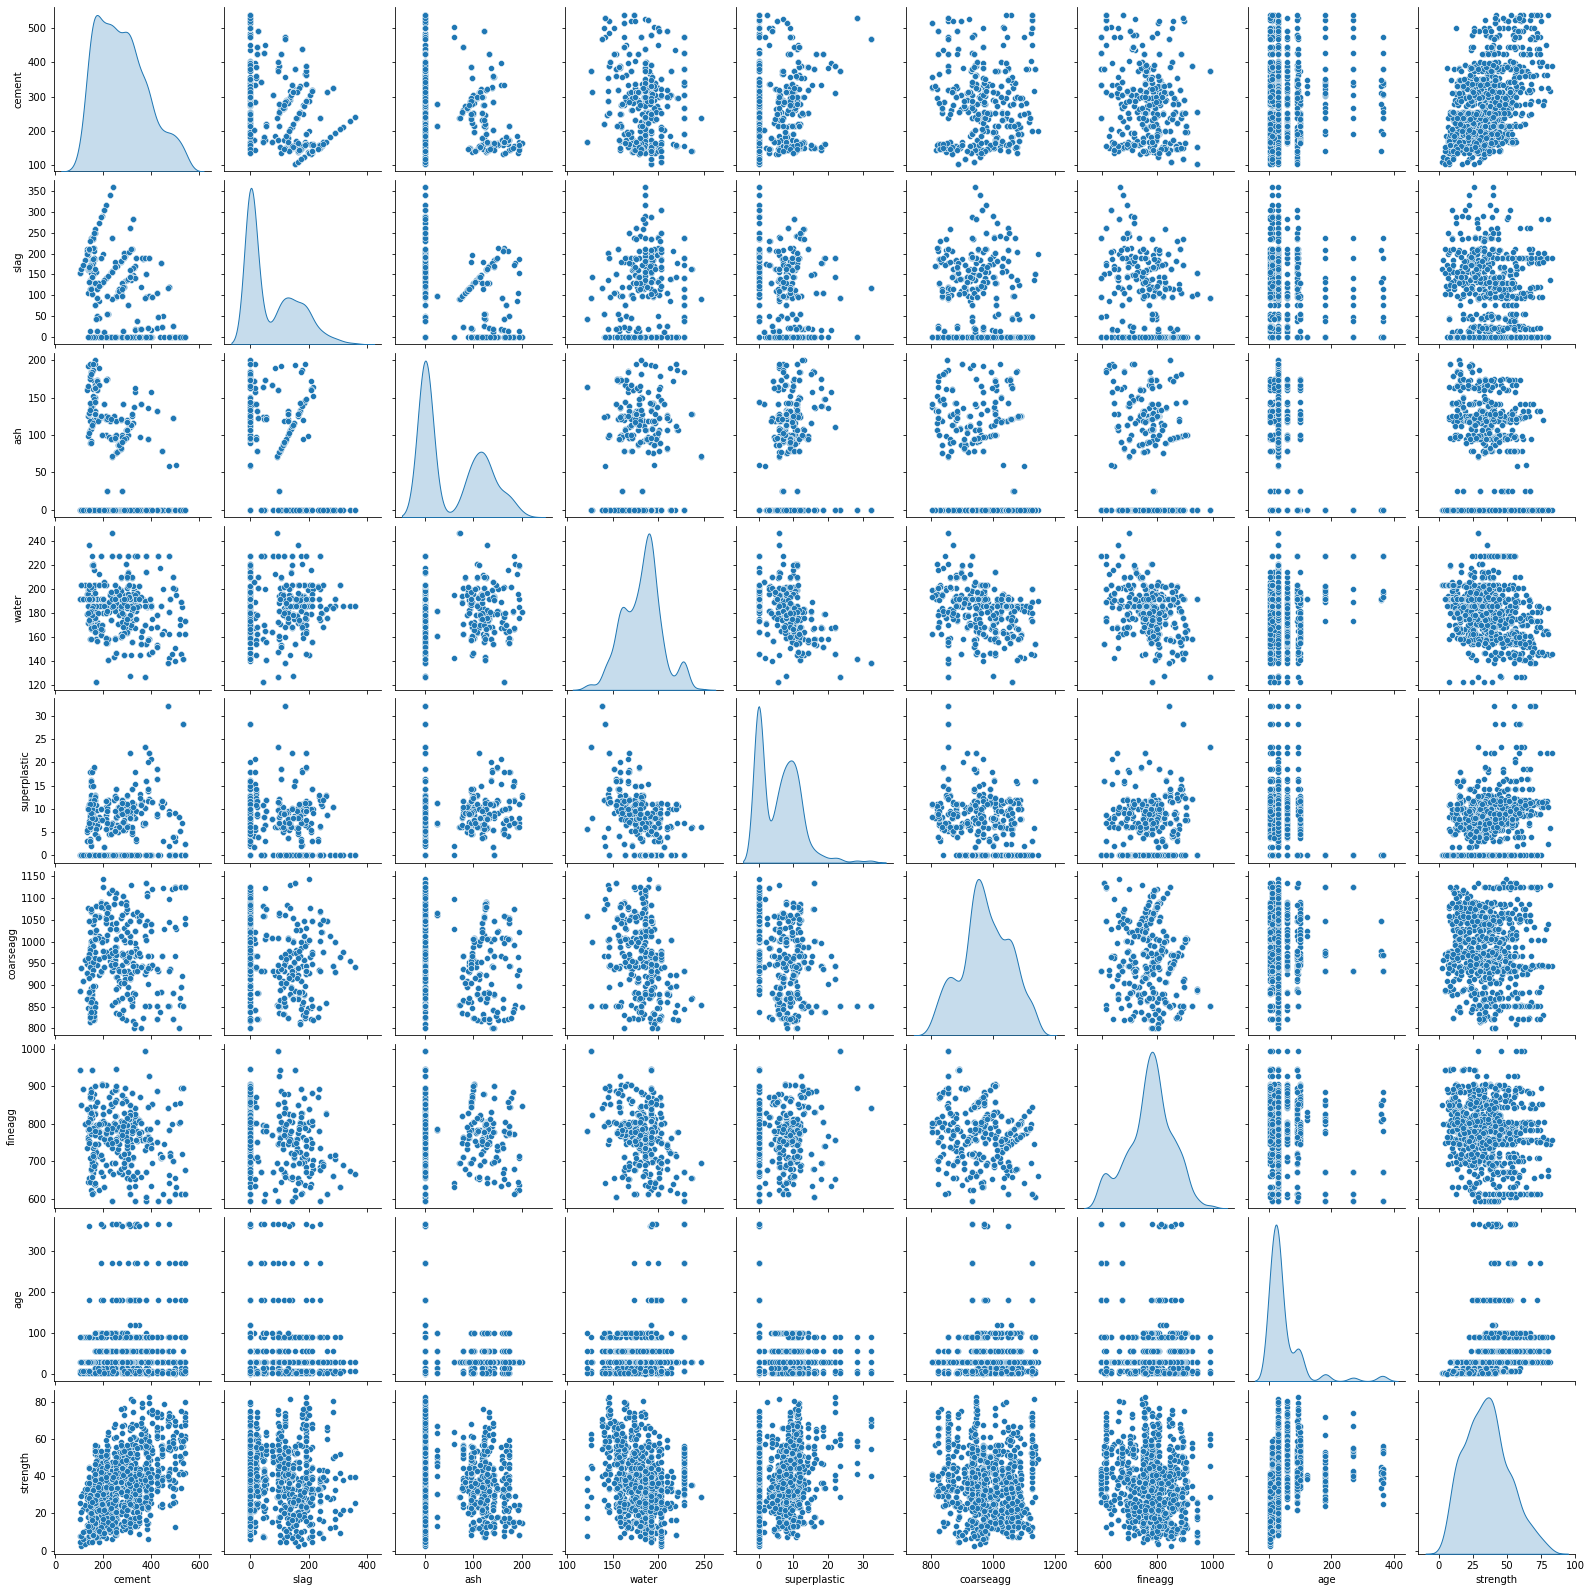

In [1466]:
sns.pairplot(mydata,diag_kind='kde')

<AxesSubplot:>

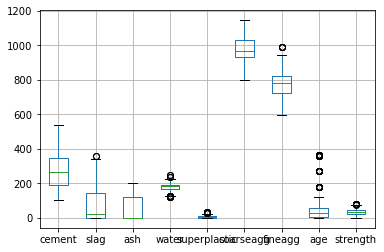

In [1467]:
 mydata.boxplot()   #we found outliers in slag water superplastic fineagg age and strength

<function matplotlib.pyplot.show(close=None, block=None)>

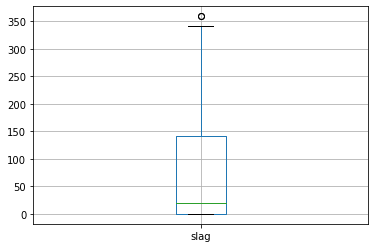

In [1468]:
mydata.boxplot(column=['slag'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

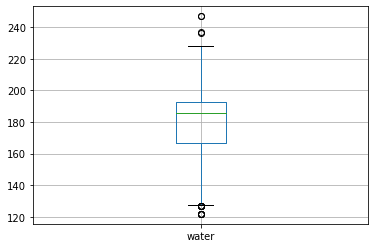

In [1469]:
mydata.boxplot(column=['water'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

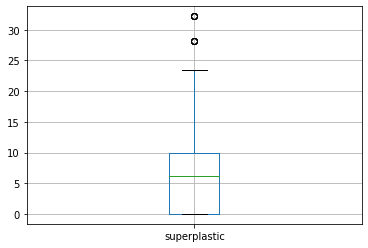

In [1470]:
mydata.boxplot(column=['superplastic'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

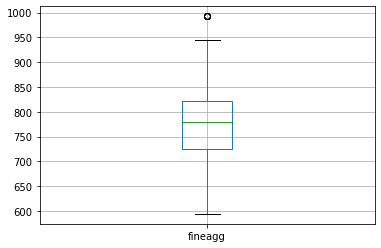

In [1471]:
mydata.boxplot(column=['fineagg'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

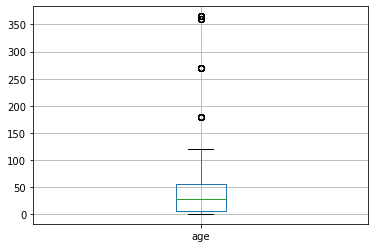

In [1472]:
mydata.boxplot(column=['age'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

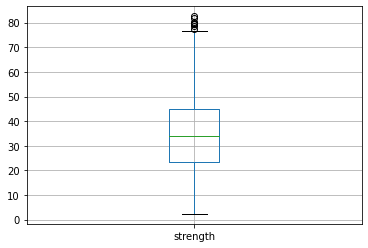

In [1473]:
mydata.boxplot(column=['strength'])
plt.show

In [1474]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [1475]:
low_slag,upp_slag=remove_outlier(mydata['slag'])
mydata['slag']=np.where(mydata["slag"]>upp_slag,upp_slag,mydata['slag'])
mydata['slag']=np.where(mydata["slag"]<low_slag,low_slag,mydata['slag'])

low_sp,upp_sp=remove_outlier(mydata['superplastic'])
mydata['superplastic']=np.where(mydata["superplastic"]>upp_sp,upp_sp,mydata['superplastic'])
mydata['superplastic']=np.where(mydata["superplastic"]<low_sp,low_sp,mydata['superplastic'])

low_w,upp_w=remove_outlier(mydata['water'])
mydata['water']=np.where(mydata["water"]>upp_w,upp_w,mydata['water'])
mydata['water']=np.where(mydata["water"]<low_w,low_w,mydata['water'])

low_f,upp_f=remove_outlier(mydata['fineagg'])
mydata['fineagg']=np.where(mydata["fineagg"]>upp_f,upp_f,mydata['fineagg'])
mydata['fineagg']=np.where(mydata["fineagg"]<low_f,low_f,mydata['fineagg'])

low_a,upp_a=remove_outlier(mydata['age'])
mydata['age']=np.where(mydata["age"]>upp_a,upp_a,mydata['age'])
mydata['age']=np.where(mydata["age"]<low_a,low_a,mydata['age'])

low_st,upp_st=remove_outlier(mydata['strength'])
mydata['strength']=np.where(mydata["slag"]>upp_st,upp_st,mydata['strength'])
mydata['strength']=np.where(mydata["slag"]<low_st,low_st,mydata['strength'])

<AxesSubplot:ylabel='slag'>

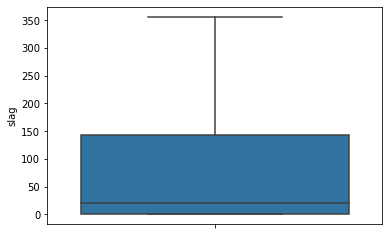

In [1476]:
sns.boxplot(y="slag",data=mydata)

<AxesSubplot:ylabel='water'>

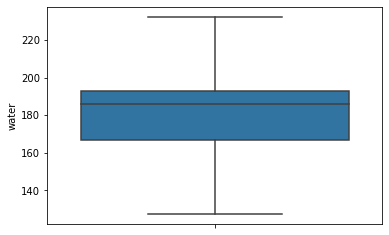

In [1477]:
sns.boxplot(y="water",data=mydata)

<AxesSubplot:ylabel='superplastic'>

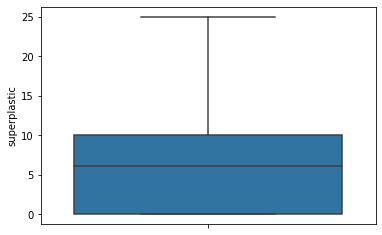

In [1478]:
sns.boxplot(y="superplastic",data=mydata)

<AxesSubplot:ylabel='water'>

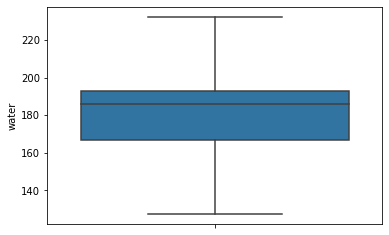

In [1479]:
sns.boxplot(y="water",data=mydata)

(<AxesSubplot:ylabel='fineagg'>, <AxesSubplot:ylabel='fineagg'>)

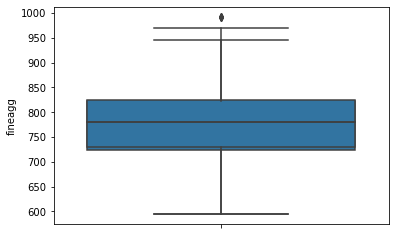

In [1480]:
sns.boxplot(y="fineagg",data=mydata),sns.boxplot(y="fineagg",data=df)

<AxesSubplot:ylabel='age'>

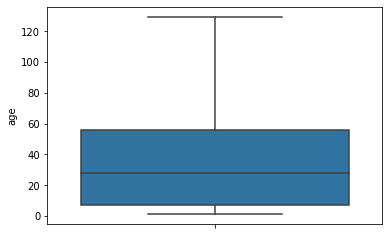

In [1481]:
sns.boxplot(y="age",data=mydata)

<AxesSubplot:ylabel='strength'>

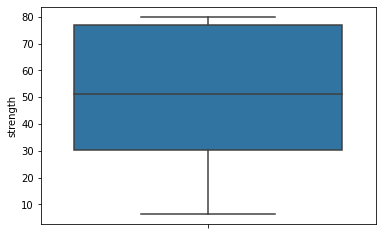

In [1482]:
sns.boxplot(y="strength",data=mydata)

In [1483]:
X=mydata.drop(['strength'],axis=1) # y will be dependent
y=mydata['strength']

### Scaling

In [1484]:
from sklearn.preprocessing import StandardScaler
std_scale =StandardScaler()
std_scale

StandardScaler()

In [1485]:
std_scale.fit_transform(X_train)
std_scale.transform(X_test)

array([[ 1.84283434,  0.49068329, -0.84991278, ..., -1.56311896,
         0.19079358, -0.30961002],
       [ 0.15019783, -0.86960697, -0.84991278, ...,  1.52454195,
         0.03309954, -0.87222632],
       [ 1.0258299 ,  0.24221276, -0.84991278, ..., -1.56311896,
         2.00995208,  0.44054504],
       ...,
       [ 0.77997209,  1.29449118, -0.84991278, ..., -0.36128037,
        -0.13342538, -0.97939132],
       [-1.20202016,  0.29831901, -0.84991278, ..., -1.09717938,
         2.22946219,  1.35144762],
       [ 1.03812279,  1.29449118, -0.84991278, ..., -0.36128037,
        -0.13342538, -0.30961002]])

In [1486]:
mydata.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,76.895
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.510
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.220
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,76.895
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,76.895


In [1487]:
corr=mydata.corr()
corr

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.303370,-0.385610,-0.057209,0.044817,-0.086205,-0.247662,0.055649,-0.058985
slag,-0.303370,1.000000,-0.312365,0.130227,0.019602,-0.277595,-0.291129,-0.054634,0.805704
ash,-0.385610,-0.312365,1.000000,-0.284541,0.436185,-0.026468,0.091873,-0.094626,-0.282839
water,-0.057209,0.130227,-0.284541,1.000000,-0.656012,-0.210399,-0.444192,0.194559,0.030107
superplastic,0.044817,0.019602,0.436185,-0.656012,1.000000,-0.235715,0.201940,-0.127533,0.134413
coarseagg,-0.086205,-0.277595,-0.026468,-0.210399,-0.235715,1.000000,-0.160494,0.012784,-0.315524
fineagg,-0.247662,-0.291129,0.091873,-0.444192,0.201940,-0.160494,1.000000,-0.097933,-0.275594
age,0.055649,-0.054634,-0.094626,0.194559,-0.127533,0.012784,-0.097933,1.000000,0.152233
strength,-0.058985,0.805704,-0.282839,0.030107,0.134413,-0.315524,-0.275594,0.152233,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='water', ylabel='cement'>

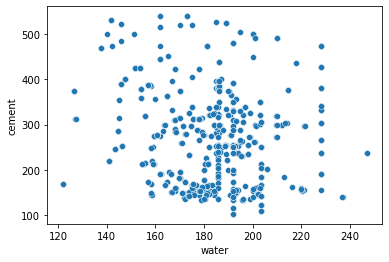

In [1488]:
sns.scatterplot(df['water'],df['cement'],data=df)     #before scaling

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='water', ylabel='cement'>

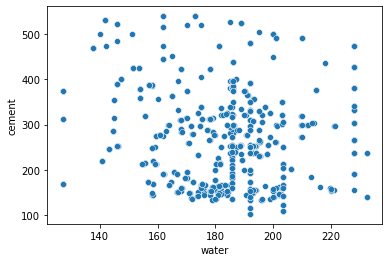

In [1489]:
sns.scatterplot(mydata['water'],mydata['cement'],data=mydata)  #after scaling

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ash', ylabel='cement'>

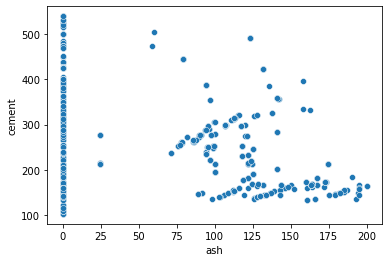

In [1490]:
sns.scatterplot(df['ash'],df['cement'],data=df)     #before scaling

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ash', ylabel='cement'>

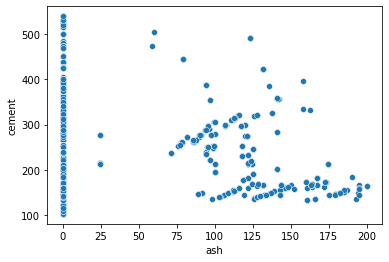

In [1491]:
sns.scatterplot(mydata['ash'],mydata['cement'],data=mydata)  #after scaling

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ash', ylabel='cement'>

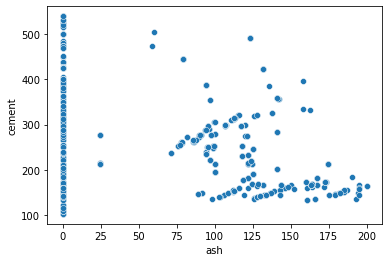

In [1492]:
sns.scatterplot(df['ash'],df['cement'],data=df)     #before scaling

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ash', ylabel='cement'>

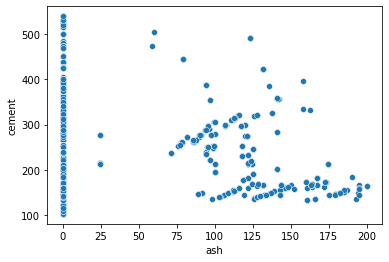

In [1493]:
sns.scatterplot(mydata['ash'],mydata['cement'],data=mydata)  #after scaling

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='cement'>

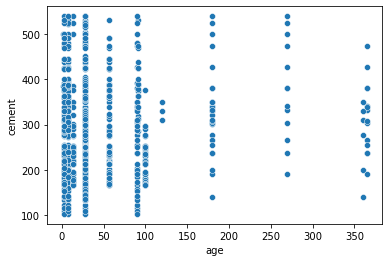

In [1494]:
sns.scatterplot(df['age'],df['cement'],data=df)     #before scaling

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='cement'>

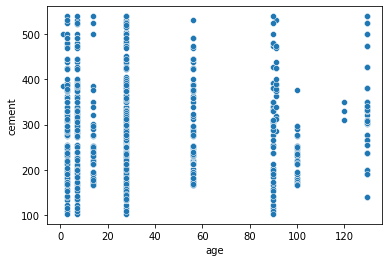

In [1495]:
sns.scatterplot(mydata['age'],mydata['cement'],data=mydata)  #after scaling

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='strength', ylabel='cement'>

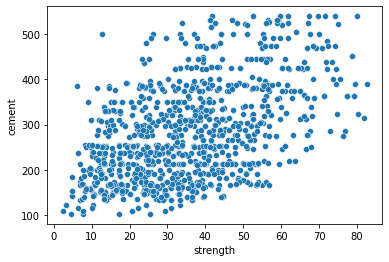

In [1496]:
sns.scatterplot(df['strength'],df['cement'],data=df)     #before scaling

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='strength', ylabel='cement'>

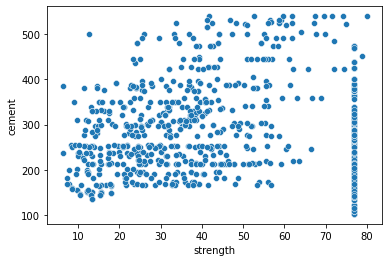

In [1497]:
sns.scatterplot(mydata['strength'],mydata['cement'],data=mydata)  #after scaling

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='superplastic', ylabel='cement'>

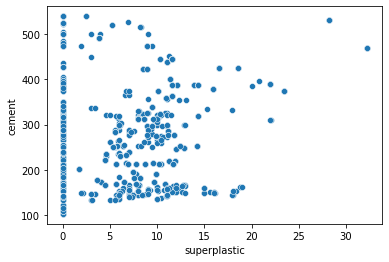

In [1498]:
sns.scatterplot(df['superplastic'],df['cement'],data=df)     #before scaling

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='superplastic', ylabel='cement'>

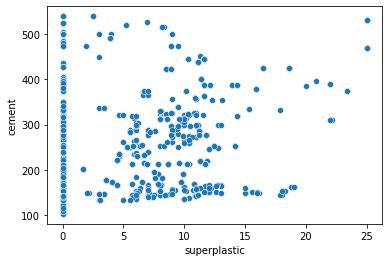

In [1499]:
sns.scatterplot(mydata['superplastic'],mydata['cement'],data=mydata)  #after scaling

In [1500]:
corr=mydata.corr()
corr

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.303370,-0.385610,-0.057209,0.044817,-0.086205,-0.247662,0.055649,-0.058985
slag,-0.303370,1.000000,-0.312365,0.130227,0.019602,-0.277595,-0.291129,-0.054634,0.805704
ash,-0.385610,-0.312365,1.000000,-0.284541,0.436185,-0.026468,0.091873,-0.094626,-0.282839
water,-0.057209,0.130227,-0.284541,1.000000,-0.656012,-0.210399,-0.444192,0.194559,0.030107
superplastic,0.044817,0.019602,0.436185,-0.656012,1.000000,-0.235715,0.201940,-0.127533,0.134413
coarseagg,-0.086205,-0.277595,-0.026468,-0.210399,-0.235715,1.000000,-0.160494,0.012784,-0.315524
fineagg,-0.247662,-0.291129,0.091873,-0.444192,0.201940,-0.160494,1.000000,-0.097933,-0.275594
age,0.055649,-0.054634,-0.094626,0.194559,-0.127533,0.012784,-0.097933,1.000000,0.152233
strength,-0.058985,0.805704,-0.282839,0.030107,0.134413,-0.315524,-0.275594,0.152233,1.000000


<AxesSubplot:>

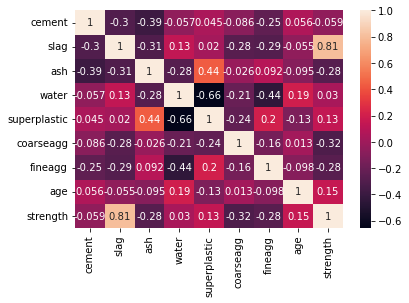

In [1501]:
sns.heatmap(corr,annot=True)

### Split Data

In [1502]:
# split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.40,random_state=1)

### Fit Model

In [1503]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [1504]:
reg_model.score(X_train,y_train)

0.7542443488369571

In [1505]:
#out of sample score R^2
reg_model.score(X_test,y_test)

0.7273907398134742

In [1506]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import linear_model 
poly = PolynomialFeatures (degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2= poly.fit_transform(X_test)
poly_clf = linear_model.LinearRegression()
poly_clf.fit(X_train2, y_train)
#y pred poly_clf.predict(x_test2)
#print(y_pred)
#In sample (training) R^2 will always improve with the number of vari 
print(poly_clf.score (X_train2, y_train))

0.9014528680327789


In [1507]:
#out off sample testing R^2 is our measure of success and does improve
print(poly_clf.score(X_test2,y_test))


0.8892080143431147


In [1508]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import linear_model 
poly = PolynomialFeatures (degree=3, interaction_only=True)

X_train2 = poly.fit_transform(X_train)

X_test2= poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()
poly_clf.fit(X_train2, y_train)

#y pred poly_clf.predict(x_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of vari 
print(poly_clf.score (X_train2, y_train))

0.9248366539496963


In [1509]:
#out off sample testing R^2 is our measure of success and does improve
print(poly_clf.score(X_test2,y_test))

0.8985609711515188
